In [233]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt 
import seaborn as sns 

from glob import glob
import librosa
import librosa.display 
import IPython.display as ipd
from itertools import cycle
sns.set_theme(style="white", palette=None)
color_pal = plt.rcParams["axes.prop_cycle"].by_key()["color"]
color_cycle = cycle(color_pal)

In [234]:
def audio_extract(filepath):
   audio_files = glob(filepath)
   return(audio_files)

audio_files1 = audio_extract(r'RAVDESS_UNCLEAN\*\*.wav')
audio_files2 = audio_extract(r'TESS Toronto emotional speech set data\*\*.wav')


In [235]:
audio_files1[0]

'RAVDESS_UNCLEAN\\Actor_01\\03-01-01-01-01-01-01.wav'

In [237]:
def Feature_DF_Creator(filelist):
    df = pd.DataFrame()
    result=np.array([])
    for file in filelist:
        y, sr = librosa.load(file)
        y_trimmed, _ = librosa.effects.trim(y, top_db=30)
        stft=np.abs(librosa.stft(y_trimmed))
        mfccs=np.mean(librosa.feature.mfcc(y=y_trimmed, sr=sr, n_mfcc=40).T, axis=0)
        mel=np.mean(librosa.feature.melspectrogram(y=y_trimmed, sr=sr).T,axis=0)
        chroma=np.mean(librosa.feature.chroma_stft(S=stft, sr=sr).T,axis=0)
        result = np.hstack(( mfccs, mel, chroma))
        if len(df.columns)==0:
            column_names = [f'col{i+1}' for i in range(len(result))]
            df = pd.DataFrame(columns=column_names)        
        df.loc[len(df)] = result
    return df    

In [278]:
df1 = Feature_DF_Creator(audio_files1)

In [280]:
lst = []
for file in audio_files1:
    lst.append(file.split("-")[2])

In [281]:
df1["feeling"] = lst

In [282]:
df1.head()

,col1,col2,col3,col4,col5,col6,col7,col8,col9,col10,...,col172,col173,col174,col175,col176,col177,col178,col179,col180,feeling
0,-485.435760,125.547394,-9.674954,24.648430,14.435009,-5.135542,-9.597648,-12.427287,-28.499622,-9.909325,...,0.621136,0.624444,0.562191,0.547790,0.609514,0.658921,0.660492,0.619759,0.549749,01
1,-482.768616,116.302711,-7.825343,29.099020,13.977192,-7.079821,-8.166739,-14.216775,-28.183737,-6.398925,...,0.544650,0.547016,0.585322,0.502808,0.565033,0.614017,0.648091,0.636803,0.570133,01
2,-473.852509,124.038818,-6.438735,27.357557,6.484826,-2.441445,-8.439914,-14.846803,-25.888828,-10.471822,...,0.634776,0.617904,0.493865,0.472746,0.565979,0.653376,0.638636,0.518308,0.513652,01
3,-471.156189,114.611877,-0.160490,28.123051,9.483885,0.481433,-8.060109,-17.652515,-24.048738,-8.849402,...,0.610664,0.576785,0.557635,0.578445,0.683943,0.657794,0.586186,0.575430,0.579479,01
4,-537.455322,115.149658,-0.266134,27.281794,11.806399,-0.392789,-10.151818,-9.871162,-21.435678,-11.071152,...,0.610679,0.589172,0.578974,0.538881,0.589539,0.625496,0.632840,0.660166,0.590782,02


In [283]:
import matplotlib.pyplot as plt
import pandas as pd
value_counts = df1['feeling'].value_counts()


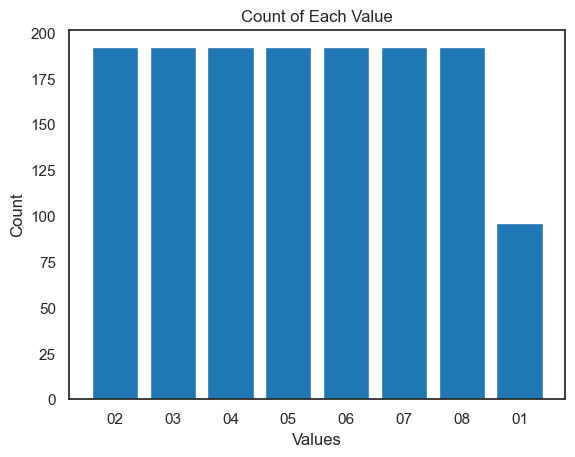

In [284]:
# Plot the values and their counts
plt.bar(value_counts.index, value_counts.values)
plt.xlabel('Values')
plt.ylabel('Count')
plt.title('Count of Each Value')
plt.show()

In [140]:
Emotion = {"01":"neutral", "02":"calm", "03":"happy", "04":"sad", "05":"angry", "06":"fearful", "07":"disgust", "08":"surprised"}

In [285]:
#Converting target col into numeric
df1["feeling"] = df1["feeling"].astype(int)

In [286]:
df1 = df1[df1['feeling'] != 1]

In [287]:
df1.shape

(1344, 181)

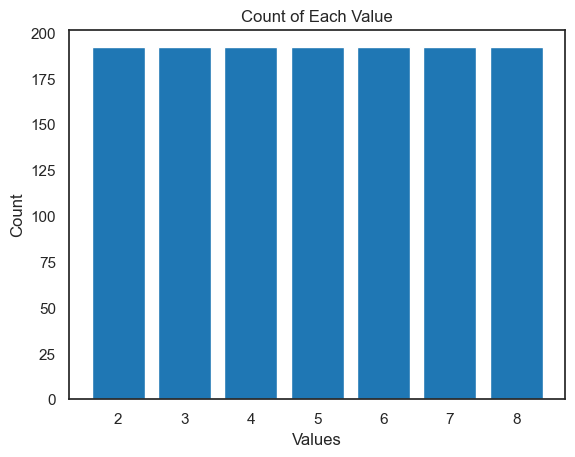

In [289]:
value_counts = df1['feeling'].value_counts()
# Plot the values and their counts
plt.bar(value_counts.index, value_counts.values)
plt.xlabel('Values')
plt.ylabel('Count')
plt.title('Count of Each Value')
plt.show()

In [288]:
df1.head()

,col1,col2,col3,col4,col5,col6,col7,col8,col9,col10,...,col172,col173,col174,col175,col176,col177,col178,col179,col180,feeling
4,-537.455322,115.149658,-0.266134,27.281794,11.806399,-0.392789,-10.151818,-9.871162,-21.435678,-11.071152,...,0.610679,0.589172,0.578974,0.538881,0.589539,0.625496,0.632840,0.660166,0.590782,2
5,-541.221741,126.537903,2.454986,20.882959,16.800463,0.455333,-10.365332,-10.118616,-16.742668,-10.085868,...,0.693676,0.586901,0.561591,0.626653,0.671709,0.649352,0.580083,0.610073,0.531500,2
6,-499.443176,123.253372,-5.768768,23.859962,7.796982,0.957703,-4.944527,-10.831729,-19.355633,-11.274094,...,0.645332,0.616189,0.559771,0.528220,0.547751,0.590485,0.618549,0.571405,0.550792,2
7,-496.596985,129.679184,-6.099539,23.197090,11.218100,-0.728725,-5.489161,-14.771072,-18.295977,-10.740245,...,0.586864,0.533162,0.484179,0.502631,0.559042,0.655913,0.629350,0.596757,0.491704,2
8,-552.144043,126.035622,4.209912,24.098150,13.817362,0.534192,-9.881056,-6.894940,-13.667630,-10.371347,...,0.614366,0.605786,0.624982,0.645263,0.707637,0.630527,0.552646,0.595972,0.578731,2


In [253]:
df1["feeling"].dtype

dtype('int32')

In [255]:
from sklearn.model_selection import train_test_split
def train_test_splitting(dataframe, targetname):
    X = dataframe.drop(columns=[targetname])
    y = dataframe[targetname]
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
    return X_train, X_test, y_train, y_test

In [256]:
target = "feeling"
X_train, X_test, y_train, y_test = train_test_splitting(df1, target)

In [257]:
y_train.value_counts()

feeling
6    163
5    157
2    155
8    153
7    150
3    149
4    148
Name: count, dtype: int64

In [258]:
X_train.head()

,col1,col2,col3,col4,col5,col6,col7,col8,col9,col10,...,col171,col172,col173,col174,col175,col176,col177,col178,col179,col180
426,-528.048889,85.506065,8.848557,21.549112,-2.730648,-2.422154,-2.558138,-25.455044,-8.692566,-7.621813,...,0.426921,0.410471,0.502617,0.587728,0.573630,0.706195,0.693216,0.621626,0.563032,0.463683
582,-302.241760,61.269974,-26.594875,0.839910,-13.823068,-28.064575,-16.838957,-27.129690,-21.079233,-6.779252,...,0.438385,0.479439,0.525163,0.592745,0.418174,0.333015,0.379118,0.441003,0.447827,0.380899
398,-472.541718,93.215523,-2.390948,17.364607,9.029876,-17.478127,-23.993280,-17.537066,-19.044020,-12.396148,...,0.508848,0.580890,0.581301,0.595752,0.578879,0.608542,0.497990,0.341173,0.320068,0.414875
672,-413.382843,88.397560,-39.533028,10.490053,-4.329689,-20.413452,-6.067649,-23.145451,-15.090004,-2.072168,...,0.478548,0.626476,0.602070,0.506595,0.446798,0.498299,0.579426,0.556527,0.540898,0.435067
823,-303.514862,30.149023,-63.906593,-19.087793,-35.203648,-40.411041,-15.543701,-39.447006,-8.756002,-11.013502,...,0.393504,0.340688,0.361494,0.389748,0.349932,0.441435,0.439185,0.483950,0.558877,0.579138


In [259]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)


AttributeError: 'numpy.ndarray' object has no attribute 'head'

In [261]:
X_train_scaled[0,1]

0.25005433

In [161]:
import numpy as np
# Assuming X_train is currently of shape (num_samples, num_features)

# Reshape to add a third dimension (timesteps)

X_train_reshaped = X_train_scaled.reshape((X_train.shape[0], -1, X_train.shape[1]))

X_test_reshaped = X_test_scaled.reshape((X_test.shape[0], -1, X_test.shape[1]))

# Now, X_train_reshaped should have the shape (num_samples, num_features, 1)


In [162]:
X_train_reshaped

array([[[-1.8490344 , -0.1592921 ,  0.30613023, ..., -0.73087174,
         -1.0680901 , -0.3182753 ]],

       [[ 1.1960708 , -0.38538605, -1.416395  , ..., -1.7408222 ,
         -2.2101276 , -1.8066593 ]],

       [[ 1.5348861 , -1.76316   , -1.2419    , ..., -1.7860271 ,
         -1.8371286 , -0.60417265]],

       ...,

       [[ 1.3939123 , -1.6566112 , -0.67179906, ..., -1.3904599 ,
         -0.05808382,  0.3074244 ]],

       [[-0.8236009 ,  0.4400722 ,  0.2504975 , ..., -0.03853741,
          0.29807076,  0.94395596]],

       [[-1.1009988 , -0.4260301 ,  1.272936  , ...,  2.3661995 ,
          1.2901777 ,  0.7612785 ]]], dtype=float32)

In [163]:
num_samples, time_steps, num_features = X_train_reshaped.shape
num_classes = 1

In [132]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Flatten
model = Sequential()
model.add(LSTM(18, input_shape=(time_steps, num_features), return_sequences=True))
model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dense(num_classes, activation='softmax'))
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
model.summary()




Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_3 (LSTM)               (None, 1, 64)             62720     
                                                                 
 flatten_2 (Flatten)         (None, 64)                0         
                                                                 
 dense_6 (Dense)             (None, 128)               8320      
                                                                 
 dense_7 (Dense)             (None, 1)                 129       
                                                                 
Total params: 71169 (278.00 KB)
Trainable params: 71169 (278.00 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [134]:


# Fitting the model with the reshaped data
model.fit(X_train_reshaped, y_train_encoded, epochs=100, batch_size=18, validation_data=(X_test_reshaped, y_test_encoded))

Epoch 1/500


64/64 [==============================] - 0s 4ms/step - loss: 0.0000e+00 - accuracy: 0.1285 - val_loss: 0.0000e+00 - val_accuracy: 0.1528
Epoch 2/500
64/64 [==============================] - 0s 3ms/step - loss: 0.0000e+00 - accuracy: 0.1285 - val_loss: 0.0000e+00 - val_accuracy: 0.1528
Epoch 3/500
64/64 [==============================] - 0s 2ms/step - loss: 0.0000e+00 - accuracy: 0.1285 - val_loss: 0.0000e+00 - val_accuracy: 0.1528
Epoch 4/500
64/64 [==============================] - 0s 3ms/step - loss: 0.0000e+00 - accuracy: 0.1285 - val_loss: 0.0000e+00 - val_accuracy: 0.1528
Epoch 5/500
64/64 [==============================] - 0s 3ms/step - loss: 0.0000e+00 - accuracy: 0.1285 - val_loss: 0.0000e+00 - val_accuracy: 0.1528
Epoch 6/500
64/64 [==============================] - 0s 3ms/step - loss: 0.0000e+00 - accuracy: 0.1285 - val_loss: 0.0000e+00 - val_accuracy: 0.1528
Epoch 7/500
64/64 [==============================] - 0s 3ms/step - loss: 0.0000e+00 - accuracy: 0.1285 - val_loss: 0.0

In [53]:
loss, accuracy = model.evaluate(X_test_reshaped, y_test)
print(f'Test Loss: {loss}, Test Accuracy: {accuracy}')

9/9 [==============================] - 0s 33ms/step - loss: 1.5503 - accuracy: 0.3958
Test Loss: 1.550295352935791, Test Accuracy: 0.3958333432674408


In [54]:
loss, accuracy = model.evaluate(X_train_reshaped, y_train_encoded)
print(f'Test Loss: {loss}, Test Accuracy: {accuracy}')

36/36 [==============================] - 1s 24ms/step - loss: 1.5071 - accuracy: 0.3854
Test Loss: 1.5070931911468506, Test Accuracy: 0.3854166567325592


In [48]:
df1[target].value_counts()

feeling
02    192
03    192
04    192
05    192
06    192
07    192
08    192
01     96
Name: count, dtype: int64

In [56]:
X = df1.drop("feeling",axis=1)
y = df1["feeling"]



In [164]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit_transform(X)

array([[-0.53455585,  1.7736765 ,  0.23835878, ...,  1.0768518 ,
         0.6776464 , -0.01726022],
       [-0.50965214,  1.4032892 ,  0.3316039 , ...,  0.9402695 ,
         0.87117773,  0.21932596],
       [-0.42640048,  1.7132356 ,  0.40150744, ...,  0.83614033,
        -0.4742772 , -0.4362226 ],
       ...,
       [ 0.6132438 , -0.94802856, -0.819019  , ..., -0.55200166,
        -0.1311167 ,  0.35034034],
       [ 0.8646828 , -1.9289322 ,  0.11124155, ..., -0.68078053,
        -0.5925043 , -0.06941622],
       [ 0.6247886 , -1.1587198 ,  0.475925  , ...,  0.47310504,
         0.736138  ,  0.9773594 ]], dtype=float32)

In [58]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [59]:
from sklearn.neural_network import MLPClassifier

In [262]:
model=MLPClassifier(alpha=0.01, batch_size=256, epsilon=1e-08, hidden_layer_sizes=(600,400,100, 50), learning_rate='adaptive', max_iter=480)

In [263]:
model.fit(X_train, y_train)

MLPClassifier(alpha=0.01, batch_size=256,
              hidden_layer_sizes=(600, 400, 100, 50), learning_rate='adaptive',
              max_iter=480)

In [264]:
from sklearn.metrics import accuracy_score

In [265]:
y_pred = model.predict(X_train)

In [266]:
accuracy = accuracy_score(y_train, y_pred)
print(f'Accuracy: {accuracy * 100:.2f}%')

Accuracy: 86.51%


In [267]:
y_pred = model.predict(X_test)

In [268]:
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy * 100:.2f}%')

Accuracy: 55.39%


In [269]:
from sklearn.neural_network import MLPClassifier
from sklearn.model_selection import GridSearchCV

In [270]:
# Define the parameter grid
param_grid = {
    'hidden_layer_sizes': [(100,), (200,), (300,)],
    'activation': ['relu', 'tanh', 'sigmoid'],
    'alpha': [0.0001, 0.001, 0.01],
    'learning_rate': ['constant', 'adaptive'],
    'batch_size': [64, 128, 256]
}

In [271]:
mlp = MLPClassifier(max_iter=500, random_state=42)
grid_search = GridSearchCV(mlp, param_grid, cv=5, n_jobs=-1)
grid_search.fit(X_train, y_train)

c:\Users\basti\anaconda3\Lib\site-packages\sklearn\model_selection\_validation.py:425: FitFailedWarning: 
270 fits failed out of a total of 810.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
170 fits failed with the following error:
Traceback (most recent call last):
  File "c:\Users\basti\anaconda3\Lib\site-packages\sklearn\model_selection\_validation.py", line 732, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "c:\Users\basti\anaconda3\Lib\site-packages\sklearn\base.py", line 1144, in wrapper
    estimator._validate_params()
  File "c:\Users\basti\anaconda3\Lib\site-packages\sklearn\base.py", line 637, in _validate_params
    validate_parameter_constraints(
  File "c:\Users\basti\anaconda3\Lib\site-packag

GridSearchCV(cv=5, estimator=MLPClassifier(max_iter=500, random_state=42),
             n_jobs=-1,
             param_grid={'activation': ['relu', 'tanh', 'sigmoid'],
                         'alpha': [0.0001, 0.001, 0.01],
                         'batch_size': [64, 128, 256],
                         'hidden_layer_sizes': [(100,), (200,), (300,)],
                         'learning_rate': ['constant', 'adaptive']})

In [273]:
best_params = grid_search.best_params_
best_params

{'activation': 'tanh',
 'alpha': 0.01,
 'batch_size': 256,
 'hidden_layer_sizes': (300,),
 'learning_rate': 'constant'}

In [274]:
final_model = MLPClassifier(**best_params, max_iter=500, random_state=42)
final_model.fit(X_train, y_train)

c:\Users\basti\anaconda3\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  warnings.warn(


MLPClassifier(activation='tanh', alpha=0.01, batch_size=256,
              hidden_layer_sizes=(300,), max_iter=500, random_state=42)

In [275]:
# Evaluate on the test set
accuracy = final_model.score(X_test, y_test)
print(f"Test Accuracy: {accuracy * 100:.2f}%")

Test Accuracy: 67.29%


In [276]:
# Evaluate on the test set
accuracy = final_model.score(X_train, y_train)
print(f"Test Accuracy: {accuracy * 100:.2f}%")

Test Accuracy: 100.00%


AttributeError: 'MLPClassifier' object has no attribute 'summary'